# Assignment

###In this assignment, we will design the drive system for a transport belt. The drive will be powered by a geared electromotor and a chain transmission. Here are the initial specifications:###

Speed of the motor: $n_3 = 1500 \: rpm$

Team specific requirements:
- Speed of chain: $v_1 = 15 \: km/h$
- Sprocket diameter: $d_1 = 450 \: mm$
- Power needed to move the carts:  $P_1 = 4.4 \: kW$
-----

In [167]:
# import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import rm_python_lib.MechDesign.Helpers as HM


from rm_python_lib.MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_
import rm_python_lib.MechDesign.Units.UnitMethods as UM

import rm_python_lib.MechDesign.RnM as RnM
belt = RnM.Belt()
gears = RnM.GearDesign()
chain = RnM.Chain()
B1 = RnM.Shaft()
B2 = RnM.Shaft()
connections = RnM.ShaftConnection()

## Sesion 1



### 1. P T n Calculations
First let's insert known data to the variables. The belt efficiency is taken from the chapter 16 from Roloff and Matek Book that explains the flat belts (the ones we will be using). Gear efficiency is assumed based on the conditions in Part 3 of this assignment.

In [168]:
# Given values
belt.n_1 = 1500*rpm_  # Speed of motor
chain.v = 15/3.6*m_/s_  # Speed of sprocket 1
chain.d_1 = UM.All_to_SI(450*mm_)  # Diameter of sprocket 1
chain.P_2 = 4.4*1000*W_  # Power needed at sprocket 1
gears.beta_1 =0    # teeth are straight cut 
gears.beta_2 = 0    # teeth are straight cut 
gears.nu_t = 0.9 # gear transmission efficiency
belt.eta = 0.98 # belt drive efficiency


Having in mind the given data now it is possible to calculate the parameters for the shaft $B2$. Also it is important to mention that the shafts are numbered from left to right. Meaning that motor shaft data is marked with a "$_1$", $B1$ shaft with and index "$_2$" and the $B2$ shaft with and index "$_3$". Since real operating conditions include transmission losses, the power decreases along the system, and each successive shaft transmits slightly less power.

In [169]:
chain.T_1 = chain.P_2/(2*chain.v/chain.d_1)  # Torque on sprocket 1

w_1 = 2*chain.v/chain.d_1             # Angular velocity of sprocket 1
chain.n_1 = UM.RemoveUnits(w_1/(2*sp.pi)*60*rpm_)*rpm_  # Rotational speed of sprocket 1

gears.P_1 = chain.P_2/ gears.nu_t  # Power needed at gear 1
belt.P = gears.P_1 / belt.eta  # Power needed at pulley 1


t=HM.EqPrint('P_1', belt.P)
t=HM.EqPrint('P_2', gears.P_1)
t=HM.EqPrint('P_3', chain.P_2)
t=HM.EqPrint('T_3', chain.T_1.evalf())
t=HM.EqPrint('n_3', chain.n_1.evalf())

Eq(P_1, 4989.0*W_)

Eq(P_2, 4889.0*W_)

Eq(P_3, 4400.0*W_)

Eq(T_3, 237.6*W_*s_)

Eq(n_3, 176.8*rpm_)

In [170]:
import math
i_tot = chain.n_1/belt.n_1
t=HM.EqPrint('i_tot',i_tot)


belt.n_2 = math.sqrt(UM.RemoveUnits(3*chain.n_1*belt.n_1/5))
t = HM.EqPrint('n_2',belt.n_2*rpm_) 

belt.i = UM.RemoveUnits(belt.n_2/belt.n_1)
t = HM.EqPrint('i_r',belt.i)

gears.omega_1 = UM.rpm_to_rad_s(belt.n_2*rpm_)
gears.omega_2 = UM.rpm_to_rad_s(chain.n_1)

gears.i = gears.omega_2/gears.omega_1
t = HM.EqPrint('i_twk', gears.i)



Eq(i_tot, 0.1179)

Eq(n_2, 398.9*rpm_)

Eq(i_r, 0.266)

Eq(i_twk, 0.4433)

Since now all the rotational speeds are known the torques can be computed.

In [171]:
belt.T_1 = belt.P/ UM.rpm_to_rad_s(belt.n_1)

belt.T_2 = gears.P_1/ gears.omega_1
t = HM.EqPrint('T_1', belt.T_1)
t = HM.EqPrint('T_2', belt.T_2)

Eq(T_1, 31.76*W_*s_)

Eq(T_2, 117.0*W_*s_)

### 2. Motor selection
------------

### Selection Criteria

Based on the provided data of desired Power output = 4.4kW, and with the belt efficiency n (= 0.98), and the gear efficiency ng (assumption ng = 0.9), and kA = 1.9, we can find that the motor desired power is around 9.48kW. Looking at the "Power P in kW for a synchronous rotational speed, 1500 rpm-1 column, we notice there is no 9.48kW value. Therefore we need to take the uper suitable value, 11kW. And hence the selected motor is 160M. It has a shaft diameter of 42mm (needed for the key calculation).

![Motor Selection Table 16-21](table16-21.png)


### 3. Finding the right $K_A$ and efficiency
------------

In this section, $K_A$ and the efficiency of the motor is calculated based on some design assumptions.


![Table_3_5b](Table_3_5b.png)

The operating conditions correspond to medium-duty service, characterized by a moderate number of startups, full-load operation with mild shocks, and a drivetrain susceptible to gear pitting. Based on these assumptions and an average daily runtime of 20 hours, the estimated operating factor is $K_A$ = 1.9. This factor accounts for dynamic effects such as torque fluctuations and transient load peaks, representing the ratio between equivalent dynamic torque and nominal steady torque. Consequently, the effective efficiency of the motor–gear system will be slightly lower than the rated efficiency due to mechanical losses and vibration-induced stresses. This estimation serves as a preliminary value and should be refined through vibration analysis, load monitoring, and thermal efficiency testing under real operating conditions.

### 4. Key calculations


The dimensions and type of the key are constrainted by the shaft's characteristic.
For general form fitting with high torque capacity, the DIN 6885 standard is suitable due to its large contact surface. Another significant reason is that this standard favors no axial movement, which is the case here.

1. Rationale for Key Type A (Rounded Ends)
We have chosen Key Type A (with rounded ends) over Type B (with squared ends) because of ease on construction and higher availability in course materials.

2. Based on the tables available in "2 - Table connections" file, and the motor selection results above, the dimensions of our keys and shafts are:
    - Shaft diameter: 42mm
    - Key width b: 12mm
    - key height h: 8mm
    - Depth key way (shaft) t1: 5mm
    - Depth key (hub) t2: 3.3mm
    - Standard length l (max): 110mm (we pick the min value between motor's length(110mm) and key's length (140mm))

3. Based on Table 12-1a, we can only record constraints of the hub's dimension. Assume that our hub is made out of steel, its diameter varies from 75.6 to 84mm, while its length is between 46.2 and 58.8mm.

4. We then use the existing formula at Formula 12.1 or the built-in function to calculate the key's surface pressure on the side at its weakest point and compare it with yield strength value (p_hat) obtained from the materials. The material's characteristics can be obtained from the file "General_Tables_RM_material_properties_EN". 
    - Shaft/Hub: yield strength ReN = 550N/mm^2 (Material 38Cr2 - from assignment description)
    - Key: yield strength ReN = 295N/mm^2 (Material E295 - From Chapter 12)

There are two ways of finding surface pressure and the threshold p_hat value: method B and C.
In average surface pressure calculation, method B/C influences the value of K_lamda: K_lamda = 1 for C and according to figure 12-2c (with reference based on l'/d = (l-b)/d). In threshold calculation, method B/C influences the formula more. Here, because of our material's characteristic, the formula for ductile material is used.
In this assignment, method C is chosen because of the dominance of uneven surface loading factor due to relative rotation of shaft/hub to alternating torques in method B.

In [172]:
# creating a new shaft connection, (this is 1 specific connection in your design)
SC = RnM.ShaftConnection() 

# setting up constants, based on assignment (units are specified using a trailing '_')
SC.d = 42*mm_ 
SC.T_nom = 70.0282*N_*m_
SC.K_A = 1.9

# setting up constants that are not likely to change
SC.phi = 1 # 1key
SC.n = 1 # 1 key
SC.K_lambda = 1 # method C

SC.K_t = 0.97
SC.b = 12*mm_
SC.h = 8*mm_

# setting up constants chosen more arbitrary
# guessing a first value for key length
SC.l = 63*mm_  # when using l'<=1.3*d with a shaft of 60mm and key width of 18 mm l'<= 78 and l<78+18=96mm and a DIN 116 A60 has max length of 85mm

# setting up helper functions
SC.lprime = SC.E12_1_hI_KeyEffectiveLength()
SC.hprime = SC.E12_1_hJ_KeyEffectiveHeight()
SC.T_eq = SC.E12_1_hC_DynamicLoadTorque()

# setting up the main equations
SC.p_gem = SC.E12_1B_KeyAveragePressure()
HM.EqPrint("p_gem",SC.p_gem)
# convert units, the previous expression still has both m_ and mm_
subst = {m_:1e3*mm_}
SC.p_gem = SC.p_gem.evalf(subs=subst)  # this line will substitute the symbol 'm_' with '1e3*mm_
t=HM.EqPrint('p_gem',SC.p_gem)


Eq(p_gem, 0.03451*N_*m_/mm_**3)

Eq(p_gem, 34.51*N_/mm_**2)

In [173]:
# The numerator constant C_num = 2 * T_eq * K_lambda (in N.mm)
C_num_sym = 2 * SC.T_eq * SC.K_lambda
C_num_val = UM.RemoveUnits(C_num_sym.evalf(subs=subst))

# The denominator constant C_denom = d * h' (in mm^2)
C_denom_val = UM.RemoveUnits((SC.d * SC.hprime*SC.n*SC.phi))

# Final Plot Constant C_plot = C_num / C_denom (in N/mm^2 * mm)
C_plot = C_num_val / C_denom_val 
# C_plot is approx. 2100 N/mm^2 * mm
HM.EqPrint('C_plot', C_plot)
HM.EqPrint('C_denom_val', SC.hprime)


Eq(C_plot, 1760.0)

Eq(C_denom_val, 3.6*mm_)

Eq(C_denom_val, 3.6*mm_)

In [174]:
# getting relevant limits for the surface pressure
R_eNShaft = 550* N_/mm_**2
K_tShaft = 0.97
R_eNKey = 295* N_/mm_**2
K_tKey = K_tShaft
R_mNGear = 1000* N_/mm_**2
K_tGear = 1
# calculate the reference strengths
R_eShaft = R_eNShaft * K_tShaft
R_eKey = R_eNKey * K_tKey
R_mGear = R_mNGear  * K_tGear 

# display the results
HM.EqPrint('R_eShaft',R_eShaft)
HM.EqPrint('R_eKey',R_eKey)
HM.EqPrint('R_mHub',R_mGear)


S_f = 1.5 #Assumption 

# Corrected Yield Strengths (R_e = R_eN * Kt)
R_e_Shaft_corr = R_eNShaft * K_tShaft
R_e_Key_corr = R_eNKey * K_tKey


# --- FIX: REMOVE UNITS FROM P_HAT FOR PLOTTING ---
p_hat_Shaft = UM.RemoveUnits(R_e_Shaft_corr) / S_f
p_hat_Key = UM.RemoveUnits(R_e_Key_corr) / S_f # TRUE WEAKEST LINK LIMIT


# calculate overall safety (Using the weakest link: R_eKey)
# Note: The safety check must use the weakest material (R_eKey)
p_applied_at_l = UM.RemoveUnits(SC.p_gem) # The applied pressure calculated using l=63mm

S = min(UM.RemoveUnits(R_eShaft),UM.RemoveUnits(R_eKey),UM.RemoveUnits(R_mGear))*N_/mm_**2 / SC.p_gem
t=HM.EqPrint('S',S)

Eq(R_eShaft, 533.5*N_/mm_**2)

Eq(R_eKey, 286.1*N_/mm_**2)

Eq(R_mHub, 1000*N_/mm_**2)

Eq(S, 8.292)

Eq(l_prime_min, 9.226)

Eq(l_prime_total, 21.23)

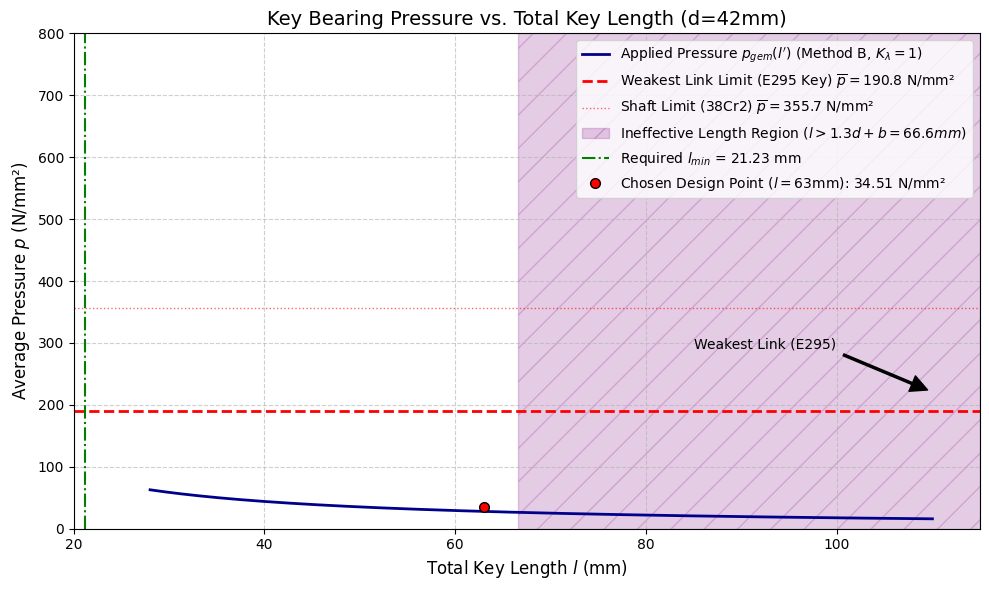


--- Final Key Design Summary ---
1. Maximum Applied Pressure (at L=28mm): 110.00 N/mm^2
2. Weakest Link Allowable Stress (p_hat): 190.77 N/mm^2
3. Calculated Minimum Required Total Length (l_min): 21.23 mm
4. Chosen Standard Length (l): 63 mm (Safety Factor: 5.53)


In [175]:
#Define the pressure function p_gem(l') for plotting (p(l') = C_plot / l')
def p_gem_function_of_l_prime(l_prime):
    """Calculates applied pressure (N/mm^2) for a given key length (mm)."""
    #l_prime[l_prime <= 1e-6] = 1e-6 
    return C_plot / l_prime

# --- L to L' Conversion Constants ---
B_WIDTH = UM.RemoveUnits(SC.b) # Key width b = 12 mm
L_EFF_LIMIT_D = 1.3 * UM.RemoveUnits(SC.d) # l'_limit = 1.3 * 42 mm = 54.6 mm

# Calculate Minimum Required Length (l'_min)
l_prime_min = C_plot / p_hat_Key
l_min_total = l_prime_min + B_WIDTH # Total minimum length required for safety
HM.EqPrint('l_prime_min', l_prime_min)
HM.EqPrint('l_prime_total', l_min_total)
# Define Plot Range (L_prime_values runs from l'_min to l'_max)
L_prime_plot_range = np.linspace(28, 110, 400)
Pressure_values = p_gem_function_of_l_prime(L_prime_plot_range)

# CONVERSION STEP: Convert l' values to L values for the X-Axis
L_values_for_plot = L_prime_plot_range + B_WIDTH/1000

# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# 1. Plot the Pressure Curve (p_gem) - X-Axis is L
plt.plot(L_values_for_plot, Pressure_values, label=f"Applied Pressure $p_{{gem}}(l')$ (Method B, $K_{{\\lambda}}={SC.K_lambda}$)", color='darkblue', linewidth=2)

# 2. Plot the TRUE System Limit (Weakest Link: E295 Key)
plt.axhline(y=p_hat_Key, color='red', linestyle='--', linewidth=2,
            label=f"Weakest Link Limit (E295 Key) $\\overline{{p}}={p_hat_Key:.1f}$ N/mm²")

# 3. Plot the Shaft Limit (38Cr2) - Stronger Link for comparison
plt.axhline(y=p_hat_Shaft, color='red', linestyle=':', linewidth=1.0, alpha=0.6,
            label=f"Shaft Limit (38Cr2) $\\overline{{p}}={p_hat_Shaft:.1f}$ N/mm²")

# 4. SHADE REGION: Ineffective Length (l' > 1.3 * d)
# The shade starts at the total length L_limit = l'_limit + b
L_limit_total = L_EFF_LIMIT_D + B_WIDTH # 54.6 mm + 12 mm = 66.6 mm
plt.axvspan(L_limit_total, 115, alpha=0.2, color='purple', hatch='/',
            label=f"Ineffective Length Region ($l > 1.3d + b = {L_limit_total:.1f}mm$)")

# 5. Plot the Minimum Required Length (l_min_total)
plt.axvline(x=l_min_total, color='green', linestyle='-.',
            label=f"Required $l_{{min}}$ = {l_min_total:.2f} mm")

# 6. Highlight the chosen length (l=63mm)
L_chosen_point = UM.RemoveUnits(SC.l)
l_prime_for_chosen_l = L_chosen_point - B_WIDTH
p_at_chosen_l = p_gem_function_of_l_prime(np.array([l_prime_for_chosen_l]))[0]

plt.plot(L_chosen_point, p_at_chosen_l, 'ro', markersize=7, markeredgecolor='black',
         label=f"Chosen Design Point ($l={L_chosen_point:.0f}$mm): {p_at_chosen_l:.2f} N/mm²", zorder=5)

# --- Final Styling ---
plt.ylim(0, 800) 
plt.xlim(20, 115)
plt.title(f"Key Bearing Pressure vs. Total Key Length (d={SHAFT_DIAMETER_MM:.0f}mm)", fontsize=14)
plt.xlabel("Total Key Length $l$ (mm)", fontsize=12) # Label now reflects 'l'
plt.ylabel("Average Pressure $p$ (N/mm²)", fontsize=12)

# Add Annotation for Weakest Link
plt.annotate('Weakest Link (E295)', xy=(L_values_for_plot[-1], p_hat_Key + 30), xytext=(85, p_hat_Key + 100), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5), fontsize=10)

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"\n--- Final Key Design Summary ---")
print(f"1. Maximum Applied Pressure (at L=28mm): {p_gem_function_of_l_prime(np.array([28 - B_WIDTH]))[0]:.2f} N/mm^2")
print(f"2. Weakest Link Allowable Stress (p_hat): {p_hat_Key:.2f} N/mm^2")
print(f"3. Calculated Minimum Required Total Length (l_min): {l_min_total:.2f} mm")
print(f"4. Chosen Standard Length (l): {L_chosen_point:.0f} mm (Safety Factor: {p_hat_Key / p_at_chosen_l:.2f})")


### Conclusion:

From the code above for the calculations on key connections, the insight can be found:

    - The p_gem pressure decreases as the key's length l increases.
    - The lowest failure limit among all materials belongs to E295 for keys, which can be noticed immediately from the tensile strength values.
    - The maximum surface pressure that the key needs to withstand is well below the failure limit (worst case lmin = 21.23mm) ==> Mechanically safe
